# Data exploration Notebook

This notebook is designed to perform data mining, provided in the recruitment task to build a regression model. 

### Important notes:

* The dataset contains missing values, particularly in the BagsCount and FlightBagsWeight columns. Moreover, these missing values often occur simultaneously.

* The dataset appears to be artificially generated for the purpose of the task, as it contains values that are unrealistic — for example, a long flight across Europe lasting only a few minutes.

* The dataset contains outliers. It will be necessary to remove them in order to obtain a better model. However, defining the boundaries for outliers based on logic and real-world expectations is challenging due to the frequent presence of unrealistic data.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Description of the dataset

#### Description of columns in the dataset:
* `DepartureDate` – date of departure 
* `DepartureYear` – year of departure 
* `DepartureMonth` – month of departure 
* `DepartureDay` – day of departure 
* `FlightNumber` – fight number 
* `DepartureAirport` – departure airport code 
* `ArrivalAirport` – arrival airport code  
* `Route` - route 
* `ActualFlightTime` – flight time 
* `ActualTotalFuel` – burnt fuel 
* `ActualTOW` - take-off weight (kg) 
* `FlownPassengers` – flown pax 
* `BagsCount` – flown bags 
* `FlightBagsWeight` – flown bags weight 

## Read the data

As the data is with a less common separator, it should be specified, also the missing value is indicated as a string “(null)”, which makes further work difficult, so these values should be changed immediately

In [2]:
# df = pd.read_csv("./data/training.csv", sep="\t")
df = pd.read_csv("./data/training.csv", sep="\t", na_values=["(null)"])
test_df = pd.read_csv("./data/validation.csv", sep="\t", na_values=["(null)"])

In [3]:
df.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016.0,175.0,61.0,440.0
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138.0,182.0,27.0,350.0
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447.0,127.0,NaN,NaN
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587.0,163.0,12.0,150.0
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090.0,178.0,37.0,490.0


In [4]:
df.describe()

,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
count,29731.0,29731.0,29731.000000,29731.000000,29731.000000,29731.000000,29298.000000,29636.000000,27447.000000,27253.000000
mean,2016.0,10.0,7.987723,4814.133934,110.069221,4782.483536,65031.246638,167.268626,45.417022,573.618464
std,0.0,0.0,4.313351,3062.612334,52.457470,2069.865460,3339.385728,20.177527,32.797217,376.524581
min,2016.0,10.0,1.000000,1.000000,2.000000,600.000000,42991.000000,4.000000,1.000000,3.000000
25%,2016.0,10.0,4.000000,2087.000000,73.000000,3210.000000,63127.000000,163.000000,23.000000,300.000000
50%,2016.0,10.0,8.000000,4765.000000,105.000000,4530.000000,65122.000000,173.000000,39.000000,490.000000
75%,2016.0,10.0,12.000000,7496.000000,140.000000,6010.000000,67154.000000,179.000000,62.000000,780.000000
max,2016.0,10.0,15.000000,9998.000000,1504.000000,17890.000000,74283.000000,189.000000,1180.000000,10530.000000


In [5]:
df.dtypes

DepartureDate        object
DepartureYear         int64
DepartureMonth        int64
DepartureDay          int64
FlightNumber          int64
DepartureAirport     object
ArrivalAirport       object
Route                object
ActualFlightTime      int64
ActualTotalFuel       int64
ActualTOW           float64
FLownPassengers     float64
BagsCount           float64
FlightBagsWeight    float64
dtype: object

In [12]:
df["DepartureDate"] = df["DepartureDate"].astype("datetime64[us]")

### lets check if there is a duplicated rows

In [13]:
df.duplicated().sum()

0

# Checking miising values in dataset

In [14]:
df.isnull().any()

DepartureDate       False
DepartureYear       False
DepartureMonth      False
DepartureDay        False
FlightNumber        False
DepartureAirport    False
ArrivalAirport      False
Route               False
ActualFlightTime    False
ActualTotalFuel     False
ActualTOW            True
FLownPassengers      True
BagsCount            True
FlightBagsWeight     True
dtype: bool

In [15]:
test_df.isnull().any()

DepartureDate       False
DepartureYear       False
DepartureMonth      False
DepartureDay        False
FlightNumber        False
DepartureAirport    False
ArrivalAirport      False
Route               False
ActualFlightTime    False
ActualTotalFuel     False
FLownPassengers      True
BagsCount            True
FlightBagsWeight     True
dtype: bool

Some columns have null values, take a look at them

In [16]:
df.isnull().sum()

DepartureDate          0
DepartureYear          0
DepartureMonth         0
DepartureDay           0
FlightNumber           0
DepartureAirport       0
ArrivalAirport         0
Route                  0
ActualFlightTime       0
ActualTotalFuel        0
ActualTOW            433
FLownPassengers       95
BagsCount           2284
FlightBagsWeight    2478
dtype: int64

In [17]:
df.isnull().sum() / df.shape[0]

DepartureDate       0.000000
DepartureYear       0.000000
DepartureMonth      0.000000
DepartureDay        0.000000
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
ActualTOW           0.014564
FLownPassengers     0.003195
BagsCount           0.076822
FlightBagsWeight    0.083347
dtype: float64

In [18]:
test_df.isnull().sum() / test_df.shape[0]

DepartureDate       0.000000
DepartureYear       0.000000
DepartureMonth      0.000000
DepartureDay        0.000000
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
FLownPassengers     0.004792
BagsCount           0.089457
FlightBagsWeight    0.096379
dtype: float64

4 columns have null values:
* ActualTOW
* FLownPassengers
* BagsCount
* FlightBagsWeight

The distribution of missing values is similar in the test data.

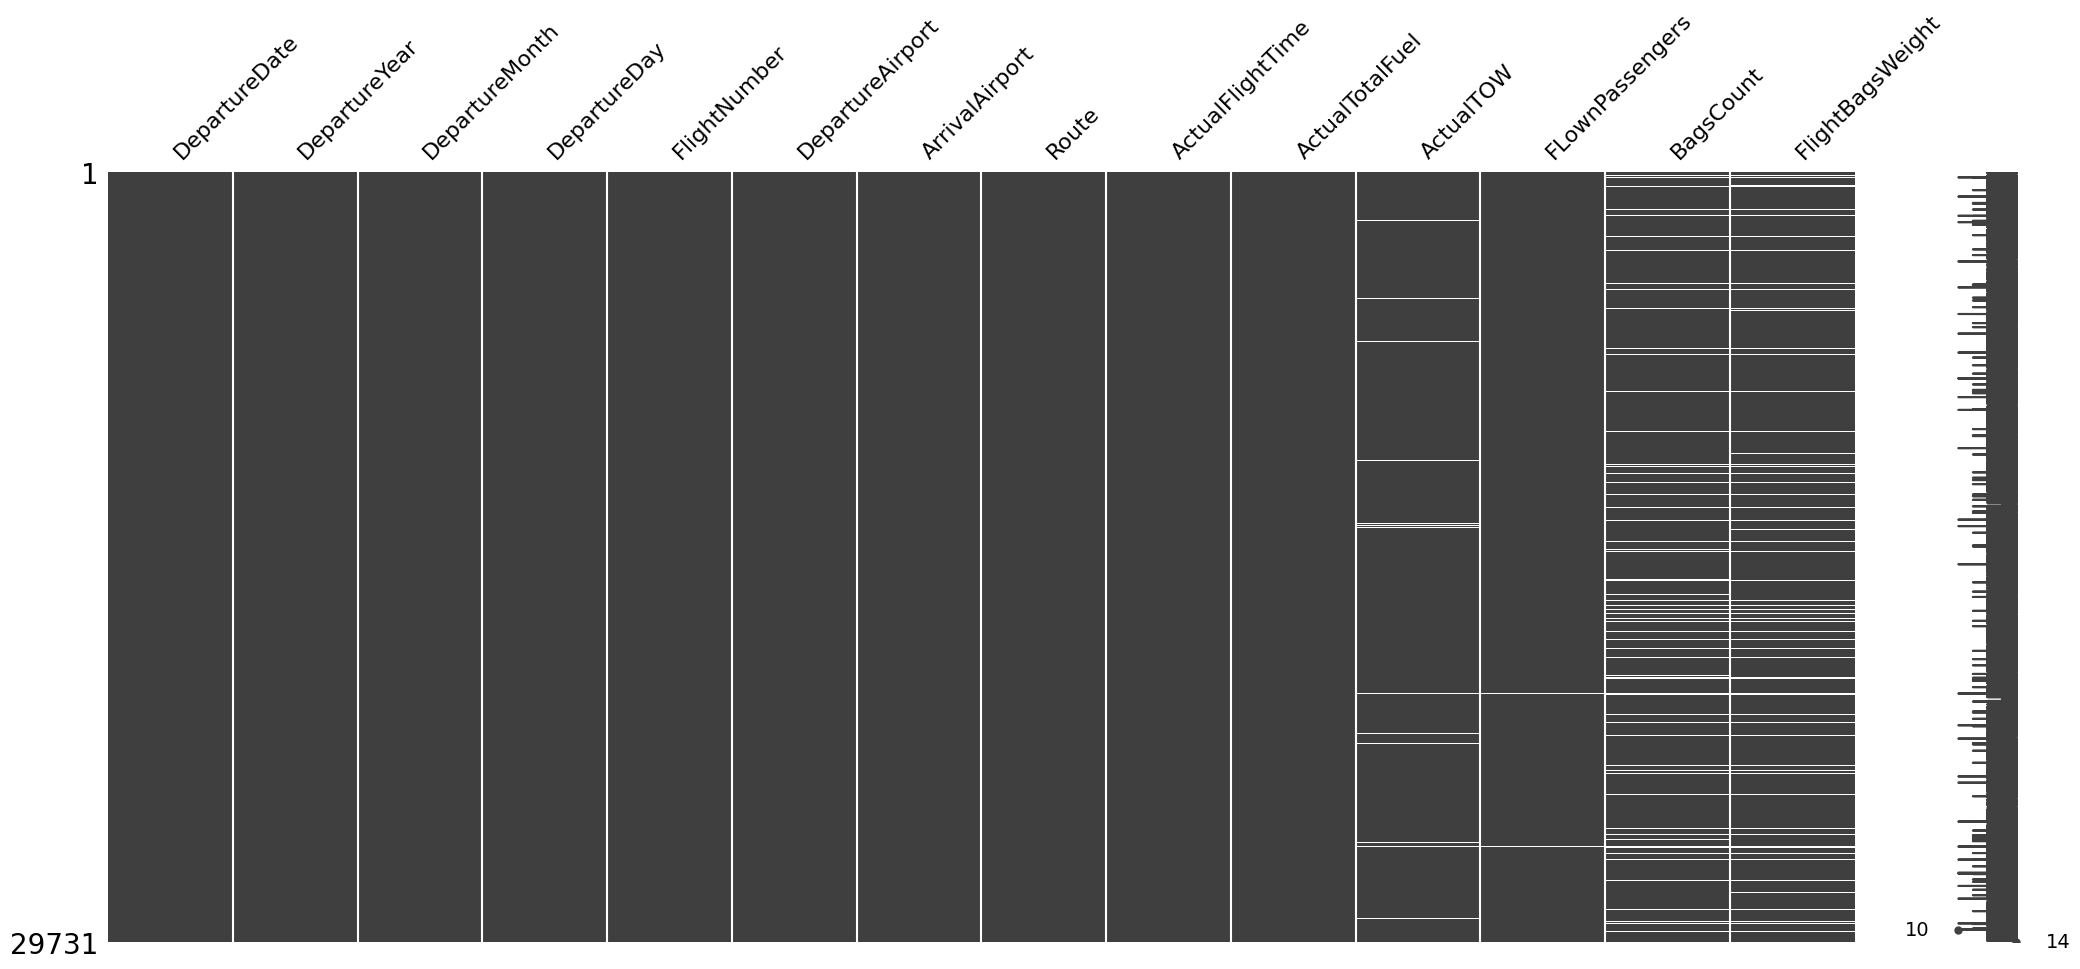

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd

msno.matrix(df)
plt.show()

At first glance, it appears that the data gaps are random. 

#### I add a new column Day of the week

In [20]:
df['DayOfWeek'] = pd.to_datetime(df['DepartureDate']).dt.dayofweek
df['BagsCount_missing'] = df['BagsCount'].isnull().astype(int)
df['FlightBagsWeight_missing'] = df['FlightBagsWeight'].isnull().astype(int)

## Are the deficiencies random? Or are there dependencies that are not immediately apparent?

### Checking the Actual TOW column for null.

<Axes: ylabel='Frequency'>

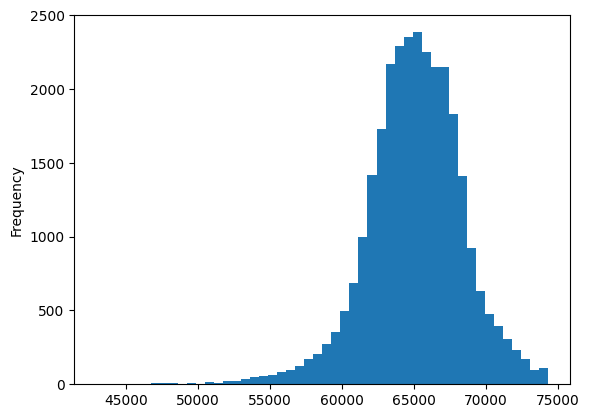

In [22]:
df["ActualTOW"].plot(kind="hist", bins=50)

<Axes: ylabel='DepartureDate'>

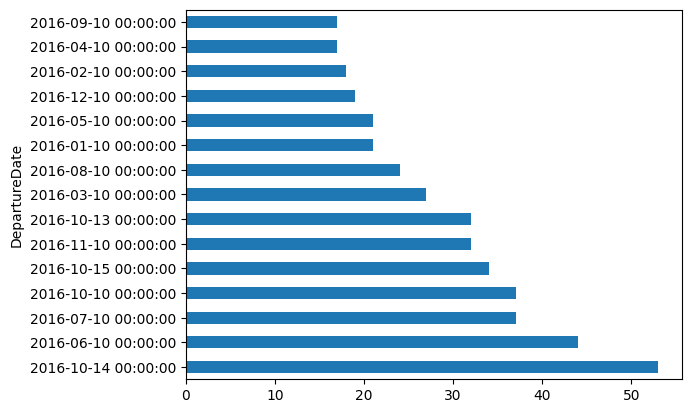

In [23]:
df[df["ActualTOW"].isna()]["DepartureDate"].value_counts().plot(kind="barh")

<Axes: ylabel='DayOfWeek'>

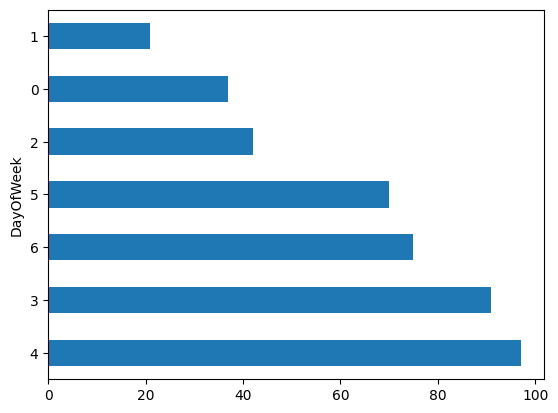

In [24]:
df[df["ActualTOW"].isna()]["DayOfWeek"].value_counts().plot(kind="barh")

In [25]:
df[df["ActualTOW"].isna()]["Route"].value_counts()

Route
EMA-EMA    10
CDT-STN     7
STN-CDT     7
PIK-PIK     6
WRO-WAW     5
           ..
MJV-PIK     1
MAD-CIA     1
DUB-LBA     1
OPO-PDL     1
STN-LRH     1
Name: count, Length: 311, dtype: int64

#### I have a suspicion that there are cases of flights from airport to same airport

In [26]:
(df["DepartureAirport"] == df["ArrivalAirport"]).sum()

18

In [27]:
df[df["DepartureAirport"] == df["ArrivalAirport"]]

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight,DayOfWeek,BagsCount_missing,FlightBagsWeight_missing
206,2016-01-10,2016,10,1,1,DUB,DUB,DUB-DUB,40,1820,NaN,NaN,NaN,NaN,6,1,1
1936,2016-01-10,2016,10,1,100,PIK,PIK,PIK-PIK,155,6740,NaN,NaN,NaN,NaN,6,1,1
4454,2016-03-10,2016,10,3,101,EMA,EMA,EMA-EMA,205,3600,NaN,NaN,NaN,NaN,3,1,1
5482,2016-03-10,2016,10,3,100,EMA,EMA,EMA-EMA,55,1000,NaN,NaN,NaN,NaN,3,1,1
6239,2016-04-10,2016,10,4,100,EMA,EMA,EMA-EMA,219,8720,NaN,NaN,NaN,NaN,6,1,1
6971,2016-04-10,2016,10,4,101,EMA,EMA,EMA-EMA,71,2880,NaN,NaN,NaN,NaN,6,1,1
8691,2016-05-10,2016,10,5,101,EMA,EMA,EMA-EMA,50,2350,NaN,NaN,NaN,NaN,1,1,1
9186,2016-05-10,2016,10,5,100,EMA,EMA,EMA-EMA,172,6150,NaN,NaN,NaN,NaN,1,1,1
10661,2016-06-10,2016,10,6,100,EMA,EMA,EMA-EMA,215,8430,NaN,NaN,NaN,NaN,4,1,1
10662,2016-06-10,2016,10,6,101,EMA,EMA,EMA-EMA,92,3510,NaN,NaN,NaN,NaN,4,1,1


My observation turned out to be true. I find it hard to imagine such situations. The only option that comes to mind is a forced/emergency landing. Beyond that, I think such cases may be an anamaly in the data. However, a quick check in the validation set also contains such situations so I can't remove these observations. 

In addition, I decided to manually analyze some flight cases. I noticed situations that can't compare. For example, a flight almost all the way across Europe from Turkey to Portugal that supposedly took a few minutes. Unfortunately, it is not possible to easily check all records in this way. I assume that the dataset is generated for the purpose of the task and going into too much detail does not make sense. 

### I check the FLownPassengers column for null.

In [29]:
df.columns

Index(['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay',
       'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route',
       'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FLownPassengers',
       'BagsCount', 'FlightBagsWeight', 'DayOfWeek', 'BagsCount_missing',
       'FlightBagsWeight_missing'],
      dtype='object')

In [30]:
df[df["FLownPassengers"].isna()]["DepartureDate"].value_counts()

DepartureDate
2016-01-10    17
2016-10-14    16
2016-05-10     9
2016-11-10     7
2016-02-10     6
2016-03-10     6
2016-07-10     6
2016-10-15     6
2016-04-10     5
2016-12-10     5
2016-06-10     4
2016-08-10     4
2016-10-10     2
2016-10-13     2
Name: count, dtype: int64

In [31]:
df[df["FLownPassengers"].isna()]["DayOfWeek"].value_counts()

DayOfWeek
6    28
4    20
3    15
5    11
2    10
1     9
0     2
Name: count, dtype: int64

In [32]:
df[df["FLownPassengers"].isna()]["Route"].value_counts()

Route
EMA-EMA    10
PIK-PIK     6
SEA-DUB     4
PIK-EMA     3
WAW-WMI     3
           ..
MAD-STN     1
PGF-SVQ     1
DUB-EMA     1
PIK-STN     1
BCN-PMI     1
Name: count, Length: 67, dtype: int64

### I check the BagsCount column for null.

<Axes: ylabel='DepartureDate'>

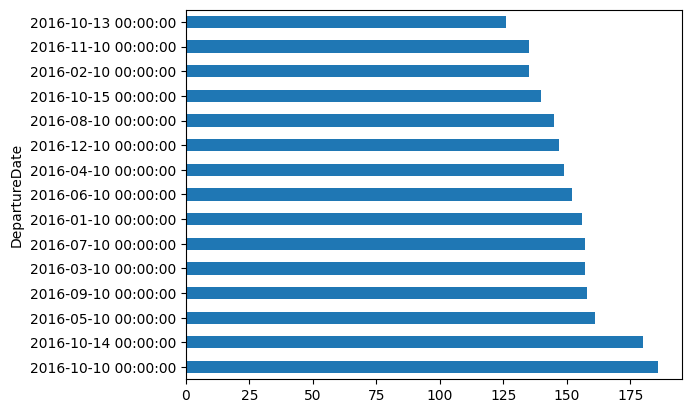

In [33]:
df[df["BagsCount"].isna()]["DepartureDate"].value_counts().plot(kind="barh")

<Axes: ylabel='DayOfWeek'>

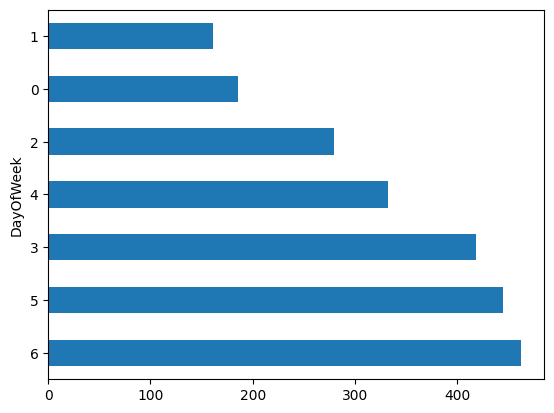

In [34]:
df[df["BagsCount"].isna()]["DayOfWeek"].value_counts().plot(kind="barh")

In [35]:
df[df["BagsCount"].isna()]["Route"].value_counts()

Route
BFS-LGW    60
LGW-DUB    42
LGW-BFS    39
CGN-SXF    32
OTP-SXF    29
           ..
NRN-ZAD     1
HHN-TSF     1
CRV-BGY     1
NYO-STN     1
SDR-AGP     1
Name: count, Length: 919, dtype: int64

### I check the FlightBagsWeight column for null.

<Axes: ylabel='DepartureDate'>

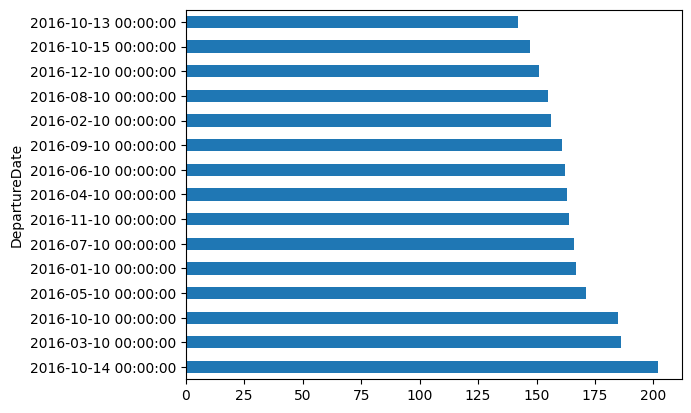

In [36]:
df[df["FlightBagsWeight"].isna()]["DepartureDate"].value_counts().plot(kind="barh")

<Axes: ylabel='DayOfWeek'>

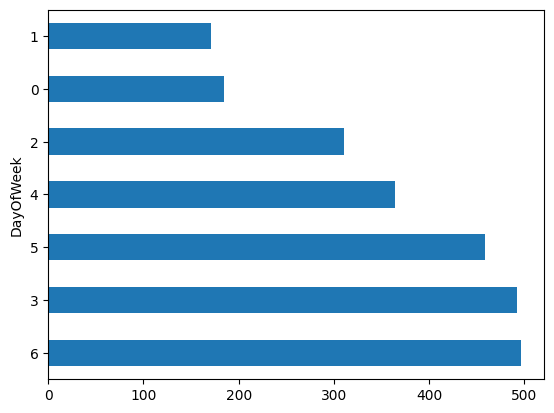

In [37]:
df[df["FlightBagsWeight"].isna()]["DayOfWeek"].value_counts().plot(kind="barh")

In [38]:
df[df["FlightBagsWeight"].isna()]["Route"].value_counts()

Route
BFS-LGW    60
LGW-DUB    42
LGW-BFS    39
CPH-LTN    34
CGN-SXF    32
           ..
CRL-TSR     1
CFU-BUD     1
AGP-EMA     1
LPA-MAD     1
SDR-AGP     1
Name: count, Length: 952, dtype: int64

#### NOTE
The analyses carried out did not show a correlation between missing data and some situation such as the day of the week. 

#### How many observations are there that have deficiencies in, for example, 2 columns ? 

In [39]:

missing_per_row = df.isna().sum(axis=1)


rows_with_1_nans = (missing_per_row == 1).sum()
rows_with_2_nans = (missing_per_row == 2).sum()
rows_with_3_nans = (missing_per_row == 3).sum()
rows_with_4_nans = (missing_per_row == 4).sum()
rows_with_5_nans = (missing_per_row == 5).sum()

print(f"The number of rows with exactly 1 NaN: {rows_with_1_nans}")
print(f"The number of rows with exactly 2 NaN: {rows_with_2_nans}")
print(f"The number of rows with exactly 3 NaN: {rows_with_3_nans}")
print(f"The number of rows with exactly NaN: {rows_with_4_nans}")
print(f"The number of rows with exactly 4 NaN: {rows_with_5_nans}")

The number of rows with exactly 1 NaN: 752
The number of rows with exactly 2 NaN: 2034
The number of rows with exactly 3 NaN: 110
The number of rows with exactly NaN: 35
The number of rows with exactly 4 NaN: 0


In [40]:
cols = ["FlightBagsWeight", "BagsCount"]
missing_per_row = df[cols].isna().sum(axis=1)

rows_with_2_nans = (missing_per_row == 2).sum()
rows_with_2_nans

2173

Data shows that many data gaps are simultaneous gaps in two columns `“FlightBagsWeight”`, `“BagsCount”`

# General analysis of features

#### Description of columns in the dataset:
* `DepartureDate` – date of departure 
* `DepartureYear` – year of departure 
* `DepartureMonth` – month of departure 
* `DepartureDay` – day of departure 
* `FlightNumber` – fight number 
* `DepartureAirport` – departure airport code 
* `ArrivalAirport` – arrival airport code  
* `Route` - route 
* `ActualFlightTime` – flight time 
* `ActualTotalFuel` – burnt fuel 
* `ActualTOW` - take-off weight (kg) 
* `FlownPassengers` – flown pax 
* `BagsCount` – flown bags 
* `FlightBagsWeight` – flown bags weight 

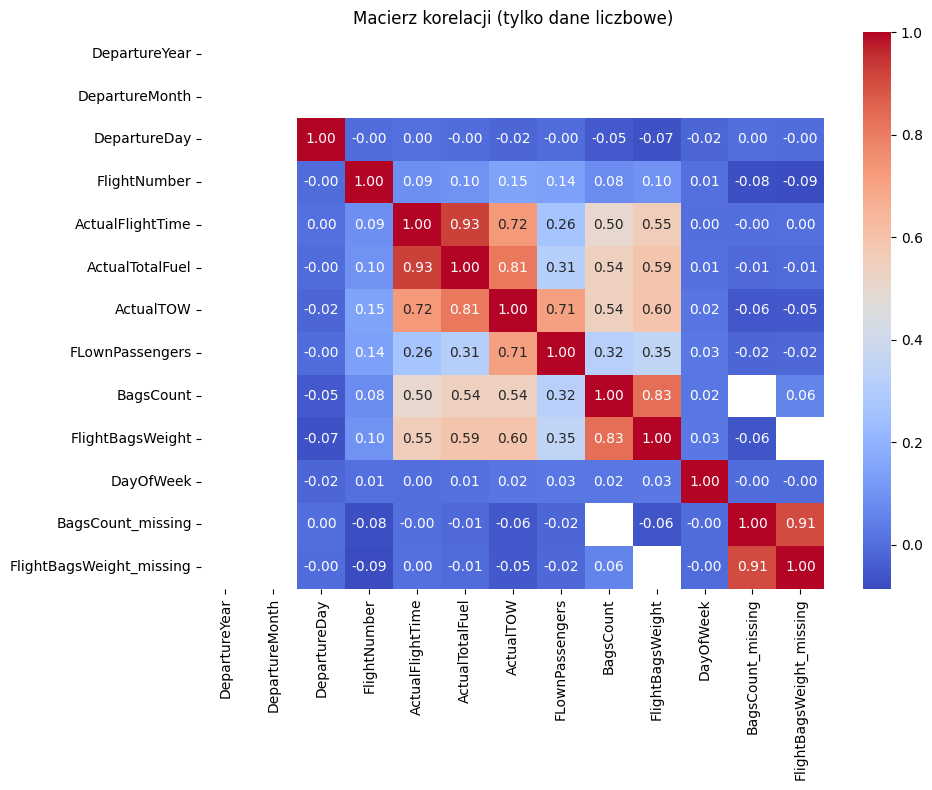

In [41]:
# Wybierz tylko kolumny numeryczne
numeric_df = df.select_dtypes(include='number')

# Oblicz macierz korelacji tylko dla tych kolumn
correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Macierz korelacji (tylko dane liczbowe)")
plt.tight_layout()
plt.show()

### flights per day

<Axes: ylabel='Frequency'>

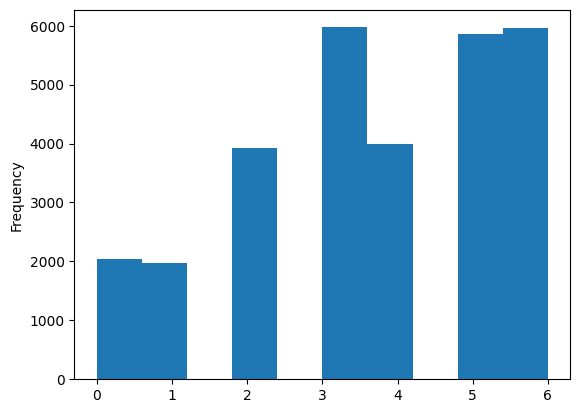

In [42]:
df["DayOfWeek"].plot(kind="hist")

Thursday and Saturday and Sunday have increased traffic. The number of passengers on these days is higher. 

<Axes: ylabel='Route'>

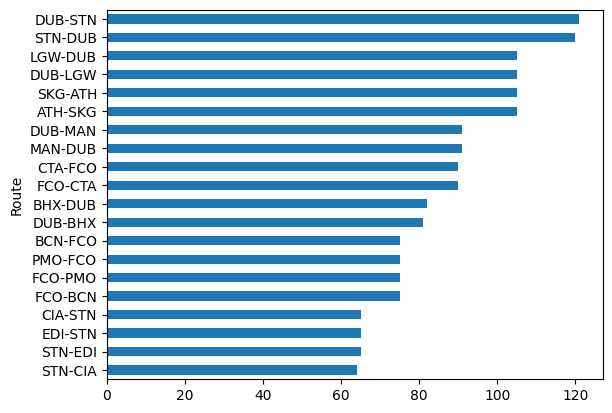

In [43]:
df["Route"].value_counts().head(20).sort_values().plot(kind="barh")

The data shows more frequent service on some routes. 

### Flight time

<Axes: ylabel='Frequency'>

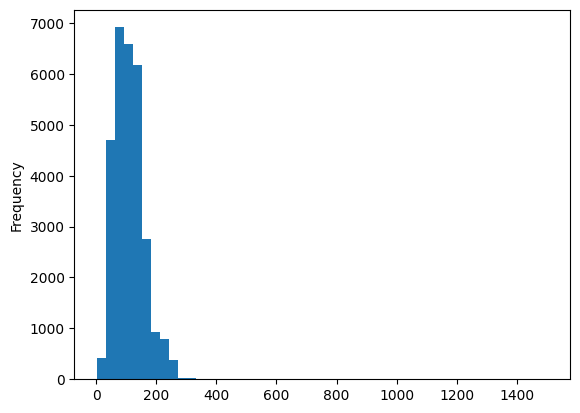

In [32]:
df["ActualFlightTime"].plot(kind="hist", bins=50)

<Axes: ylabel='Frequency'>

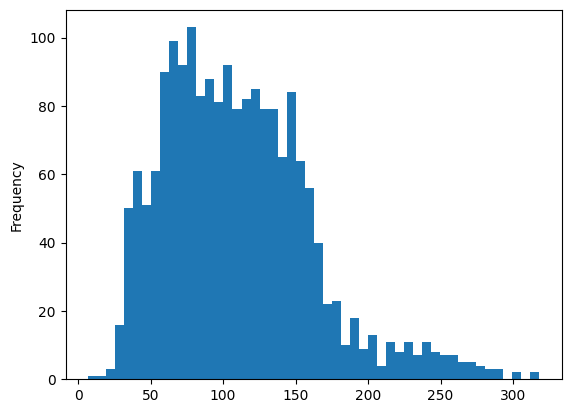

In [33]:
test_df["ActualFlightTime"].plot(kind="hist", bins=50)

In [44]:
df["ActualFlightTime"].sort_values()

16803       2
14929       3
24239       4
12809       5
25685       7
         ... 
28802    1440
26689    1440
19570    1440
16679    1440
9753     1504
Name: ActualFlightTime, Length: 29731, dtype: int64

The chart indicates that there are outliers in the dataset. It seems unlikely that the flight will last 2 or 3 min as well as 24 h probably a dozen max. 

In [53]:
df[df["ActualFlightTime"] > 500]

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
7979,05/10/2016,2016,10,5,800,SEA,DUB,SEA-DUB,550,17890,NaN,NaN,NaN,NaN
9753,05/10/2016,2016,10,5,2514,OTP,MAD,OTP-MAD,1504,9330,71199.0,178.0,NaN,NaN
16679,09/10/2016,2016,10,9,1961,TFS,SVQ,TFS-SVQ,1440,5030,65449.0,189.0,46.0,600.0
19570,10/10/2016,2016,10,10,8025,MJV,STN,MJV-STN,1440,7108,68242.0,181.0,75.0,980.0
21876,12/10/2016,2016,10,12,800,SEA,DUB,SEA-DUB,532,17680,NaN,NaN,NaN,NaN
24308,13/10/2016,2016,10,13,9986,PSA,TPS,PSA-TPS,1440,3060,65358.0,162.0,NaN,NaN
25079,13/10/2016,2016,10,13,800,SEA,DUB,SEA-DUB,530,17500,NaN,NaN,NaN,NaN
26689,14/10/2016,2016,10,14,5286,SVQ,MRS,SVQ-MRS,1440,4710,65394.0,161.0,72.0,940.0
27089,14/10/2016,2016,10,14,800,SEA,DUB,SEA-DUB,519,16930,NaN,NaN,NaN,NaN
28802,15/10/2016,2016,10,15,1063,WMI,MAD,WMI-MAD,1440,8804,71018.0,179.0,36.0,470.0


### NOTE:
Unfortunately, the hard part is checking all the lines to see if they make sense. From previous observations, I assume that the data is not generated for the task / possibly altered for those purposes. Therefore, the hard part is estimating what is an outlier / error and what is true. When building the final model, I will probably determine the maximum flight length based on information from the Internet. 

In [ ]:
mean = df['ActualFlightTime'].mean()
std = df['ActualFlightTime'].std()

# z score reange
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

print(f"Z Score range: [{lower_bound:.2f}, {upper_bound:.2f}]")

Z Score range: [-47.30, 267.44]


for this data z score is not enought, there are longer flights. For example from Europe to USA. 
Lets assume here that longest flight can have 18h -> 18*60 => 1080 min

As for the lower limit, I don't know. It seems to me that there are rather no flights shorter than 20-30 min. In the validation data it comes out that there are. 

### Total Fuel

<Axes: ylabel='Frequency'>

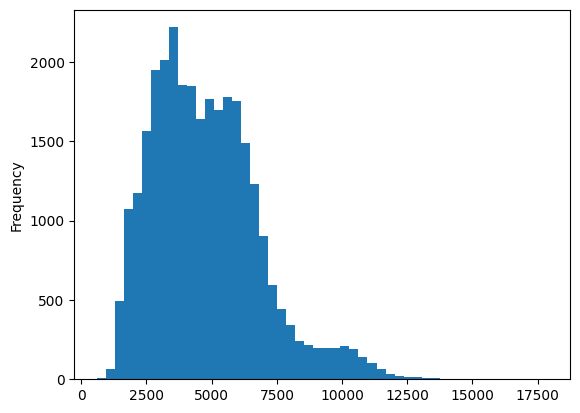

In [44]:
df["ActualTotalFuel"].plot(kind="hist", bins=50)

In [45]:
df["ActualTotalFuel"].sort_values().tail(20)

15548    13250
15749    13283
16733    13288
9796     13360
808      13559
28153    13632
27914    13670
14074    13700
2826     13714
8107     13723
22751    13760
22720    13786
13824    13820
25953    14090
28190    14550
1343     14907
27089    16930
25079    17500
21876    17680
7979     17890
Name: ActualTotalFuel, dtype: int64

In [46]:
df[df["ActualTotalFuel"] > 14000]

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight,DayOfWeek,BagsCount_missing,FlightBagsWeight_missing
1343,2016-01-10,2016,10,1,6121,WMI,TFS,WMI-TFS,349,14907,74283.0,187.0,NaN,NaN,6,1,1
7979,2016-05-10,2016,10,5,800,SEA,DUB,SEA-DUB,550,17890,NaN,NaN,NaN,NaN,1,1,1
21876,2016-12-10,2016,10,12,800,SEA,DUB,SEA-DUB,532,17680,NaN,NaN,NaN,NaN,5,1,1
25079,2016-10-13,2016,10,13,800,SEA,DUB,SEA-DUB,530,17500,NaN,NaN,NaN,NaN,3,1,1
25953,2016-10-14,2016,10,14,6123,WMI,LPA,WMI-LPA,341,14090,74283.0,178.0,45.0,589.0,4,0,0
27089,2016-10-14,2016,10,14,800,SEA,DUB,SEA-DUB,519,16930,NaN,NaN,NaN,NaN,4,1,1
28190,2016-10-15,2016,10,15,6121,WMI,TFS,WMI-TFS,345,14550,74283.0,186.0,NaN,NaN,5,1,1


### NOTE: 
Here also few obserwation with unusual values, but i don't have proof to simply delete this

## FLownPassengers

<Axes: ylabel='Frequency'>

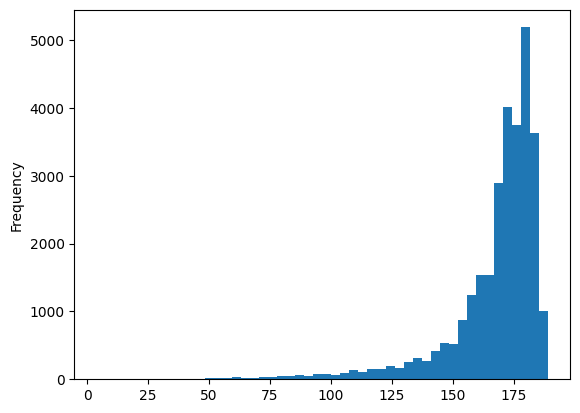

In [47]:
df["FLownPassengers"].plot(kind="hist", bins=50)

In [48]:
df["FLownPassengers"].max()

189.0

In [49]:
df.columns

Index(['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay',
       'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route',
       'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FLownPassengers',
       'BagsCount', 'FlightBagsWeight', 'DayOfWeek', 'BagsCount_missing',
       'FlightBagsWeight_missing'],
      dtype='object')

<Axes: ylabel='DayOfWeek'>

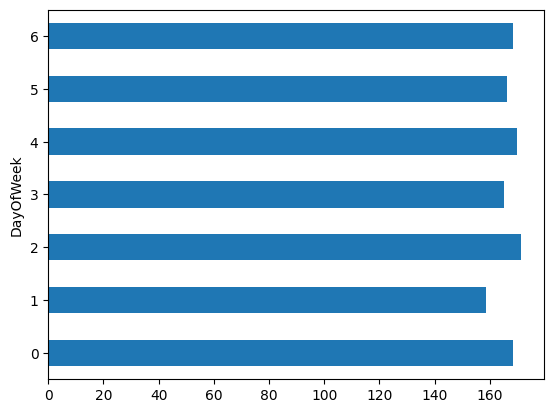

In [50]:
df.groupby('DayOfWeek')['FLownPassengers'].mean().plot(kind="barh")

### NOTE:
Looks reasonably real and normal. 

## BagsCount

<Axes: ylabel='Frequency'>

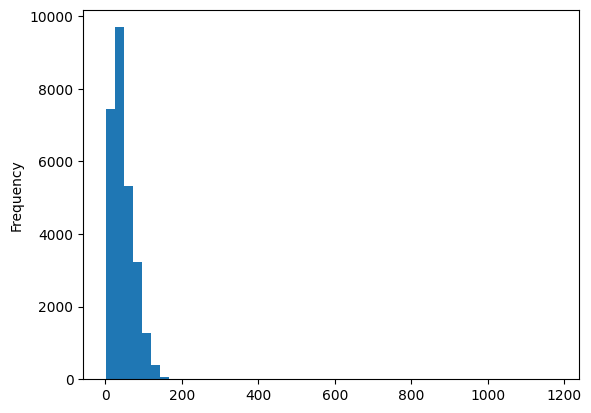

In [ ]:
df["BagsCount"].plot(kind="hist", bins=50)

In [82]:
(df["BagsCount"] > 300).sum()

14

In [84]:
df[df["BagsCount"] > 300]

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
5935,03/10/2016,2016,10,3,8166,STN,TFS,STN-TFS,255,11060,72560.0,182.0,765.0,990.0
7344,04/10/2016,2016,10,4,4915,VRN,PMO,VRN-PMO,72,3100,63943.0,181.0,402.0,30.0
7486,04/10/2016,2016,10,4,663,BHX,DUB,BHX-DUB,43,1970,60732.0,159.0,310.0,24.0
16735,09/10/2016,2016,10,9,4542,VRN,STN,VRN-STN,100,4590,64215.0,163.0,624.0,41.0
16745,09/10/2016,2016,10,9,4915,VRN,PMO,VRN-PMO,64,3000,63236.0,169.0,597.0,48.0
17986,10/10/2016,2016,10,10,5184,FKB,PMI,FKB-PMI,93,3920,64088.0,178.0,1010.0,77.0
18391,10/10/2016,2016,10,10,968,STN,GOT,STN-GOT,93,4170,65140.0,184.0,669.0,NaN
18667,10/10/2016,2016,10,10,1563,VRN,BHX,VRN-BHX,113,5230,67426.0,180.0,833.0,56.0
20406,11/10/2016,2016,10,11,653,PIK,TFS,PIK-TFS,261,11100,71888.0,174.0,1150.0,1490.0
23607,12/10/2016,2016,10,12,663,BHX,DUB,BHX-DUB,38,2030,62619.0,170.0,340.0,26.0


### NOTE:
Its hard to belive that in flight with 150-180 passangers there will be more than 300 bags. Its close to 2 bags per person. 

I assume that this are outliers.

<Axes: ylabel='Frequency'>

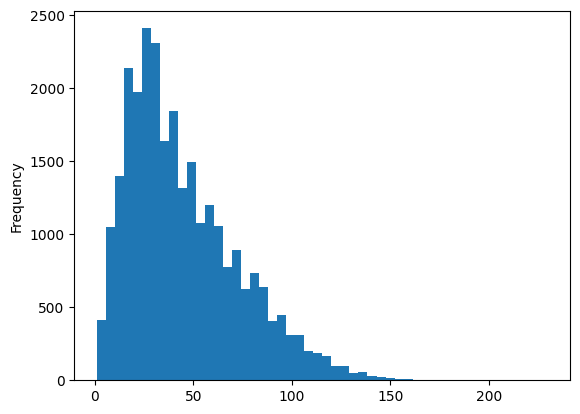

In [88]:
df[df["BagsCount"] < 300]["BagsCount"].plot(kind="hist", bins=50)

<Axes: ylabel='DayOfWeek'>

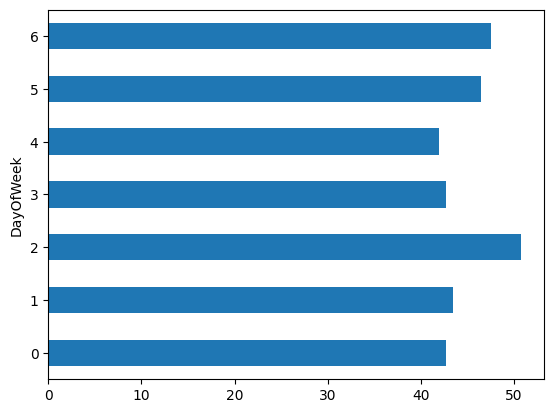

In [36]:
df.groupby('DayOfWeek')['BagsCount'].mean().plot(kind="barh")

## FlightBagsWeight

<Axes: ylabel='Frequency'>

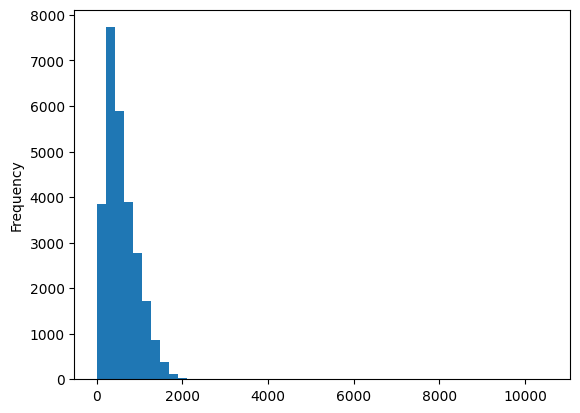

In [89]:
df["FlightBagsWeight"].plot(kind="hist", bins=50)

In [51]:
(df["FlightBagsWeight"] > 2200).sum()

14

In [52]:
df[df["FlightBagsWeight"] > 2200]

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight,DayOfWeek,BagsCount_missing,FlightBagsWeight_missing
158,2016-01-10,2016,10,1,8389,ZAD,STN,ZAD-STN,125,5270,66211.0,171.0,62.0,8000.0,6,0,0
178,2016-01-10,2016,10,1,9022,WMI,ATH,WMI-ATH,135,5950,69911.0,176.0,173.0,2250.0,6,0,0
869,2016-01-10,2016,10,1,7147,SVQ,DUB,SVQ-DUB,155,6947,70310.0,179.0,177.0,2299.0,6,0,0
3861,2016-02-10,2016,10,2,7034,DUB,FAO,DUB-FAO,150,6830,69258.0,181.0,177.0,2301.0,2,0,0
6664,2016-04-10,2016,10,4,7146,DUB,SVQ,DUB-SVQ,160,7000,NaN,177.0,172.0,2236.0,6,0,0
11635,2016-06-10,2016,10,6,9862,LPL,AGP,LPL-AGP,155,6660,67390.0,182.0,81.0,10530.0,4,0,0
12398,2016-07-10,2016,10,7,9874,BRI,MLA,BRI-MLA,67,2930,64179.0,176.0,28.0,3270.0,6,0,0
12478,2016-07-10,2016,10,7,2467,SZZ,STN,SZZ-STN,86,3620,61041.0,147.0,21.0,2700.0,6,0,0
13131,2016-07-10,2016,10,7,8989,TPS,AOI,TPS-AOI,69,3110,66120.0,186.0,31.0,4000.0,6,0,0
15808,2016-08-10,2016,10,8,7046,DUB,AGP,DUB-AGP,149,6131,68188.0,182.0,172.0,2236.0,2,0,0


<Axes: ylabel='DayOfWeek'>

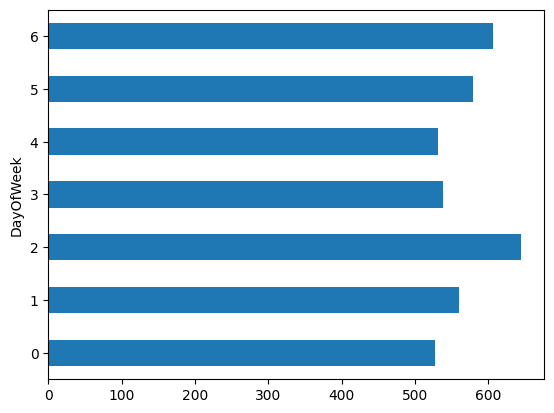

In [53]:
df.groupby('DayOfWeek')['FlightBagsWeight'].mean().plot(kind="barh")

In [54]:
df.columns

Index(['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay',
       'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route',
       'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FLownPassengers',
       'BagsCount', 'FlightBagsWeight', 'DayOfWeek', 'BagsCount_missing',
       'FlightBagsWeight_missing'],
      dtype='object')

<Axes: xlabel='ActualTotalFuel', ylabel='ActualFlightTime'>

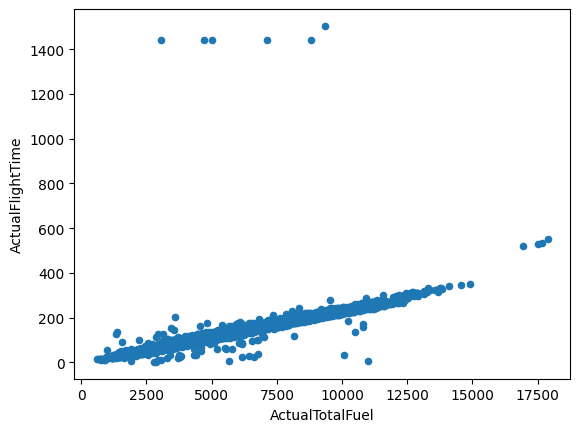

In [55]:
df.plot(kind='scatter', x="ActualTotalFuel", y="ActualFlightTime")

<Axes: xlabel='BagsCount', ylabel='FlightBagsWeight'>

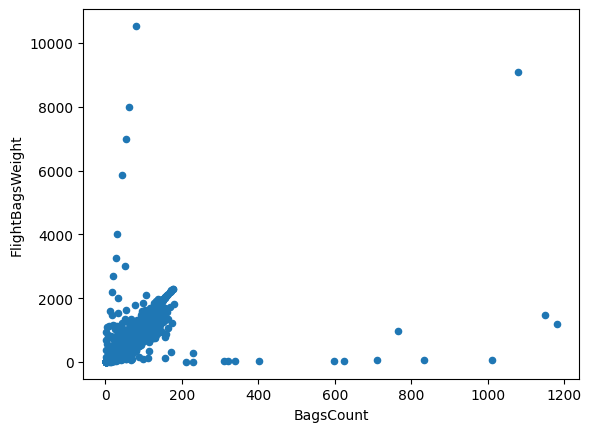

In [56]:
df.plot(kind='scatter', x="BagsCount", y="FlightBagsWeight")

### NOTE:
If outliers were to be discarded, one could see a strong correlation between these two characteristics

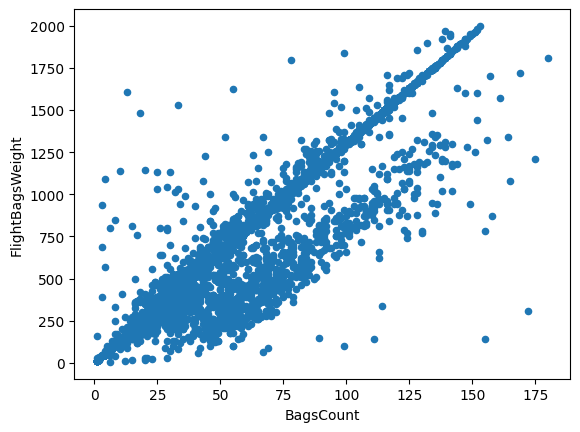

In [57]:
df_filtered = df[(df['BagsCount'] <= 200) & (df['FlightBagsWeight'] <= 2000)]

# Wykres
df_filtered.plot(kind='scatter', x="BagsCount", y="FlightBagsWeight")
plt.show()

In [58]:
df_filtered = df[(df['BagsCount'] <= 200) & (df['FlightBagsWeight'] <= 2000)]

In [59]:
df_filtered["mean_bag"] = df["FlightBagsWeight"] / df_filtered["BagsCount"]

/tmp/ipykernel_8491/3325597508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["mean_bag"] = df["FlightBagsWeight"] / df_filtered["BagsCount"]


<Axes: ylabel='Frequency'>

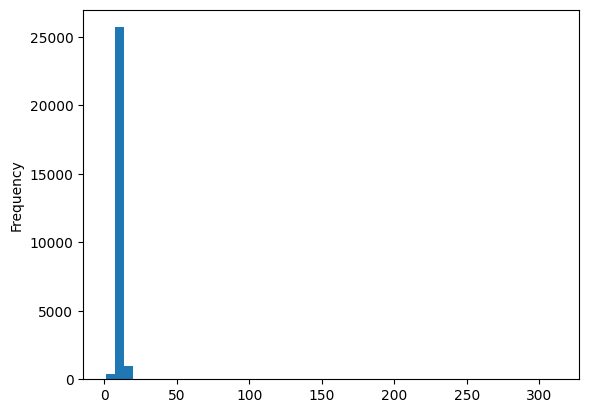

In [60]:
df_filtered["mean_bag"].plot(kind="hist", bins=50)

In [61]:
df_filtered["mean_bag"].mean()

12.942782880952182

/home/szczepan/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


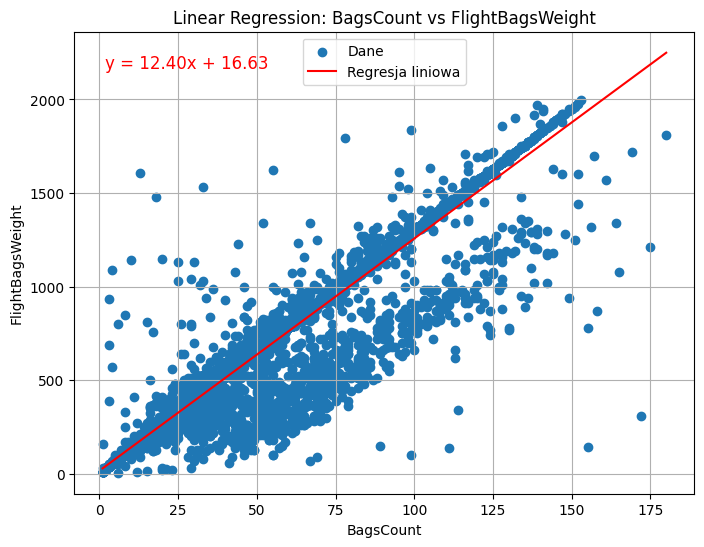

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# data filtering
df_filtered = df[(df['BagsCount'] <= 200) & (df['FlightBagsWeight'] <= 2000)]

# preparing data
X = df_filtered[['BagsCount']] 
y = df_filtered['FlightBagsWeight']

# Linear Regression
model = LinearRegression()
model.fit(X, y)


x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = model.predict(x_vals)

# regeression formula
slope = model.coef_[0]
intercept = model.intercept_
equation = f'y = {slope:.2f}x + {intercept:.2f}'


# Wykres
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Dane')
plt.plot(x_vals, y_vals, color='red', label='Regresja liniowa')
plt.xlabel('BagsCount')
plt.ylabel('FlightBagsWeight')
plt.title('Linear Regression: BagsCount vs FlightBagsWeight')
plt.legend()
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='top')

plt.grid(True)
plt.show()


You can use such regression when creating new variables, filling in data or checking that values are fairly normal. 

<Axes: xlabel='BagsCount', ylabel='ActualFlightTime'>

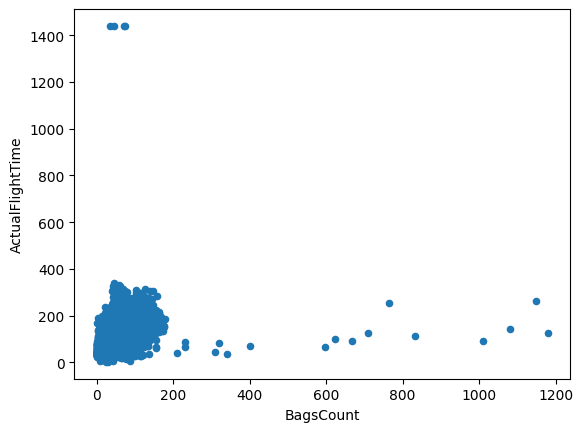

In [36]:
df.plot(kind='scatter', x="BagsCount", y="ActualFlightTime")

<Axes: xlabel='BagsCount', ylabel='ActualFlightTime'>

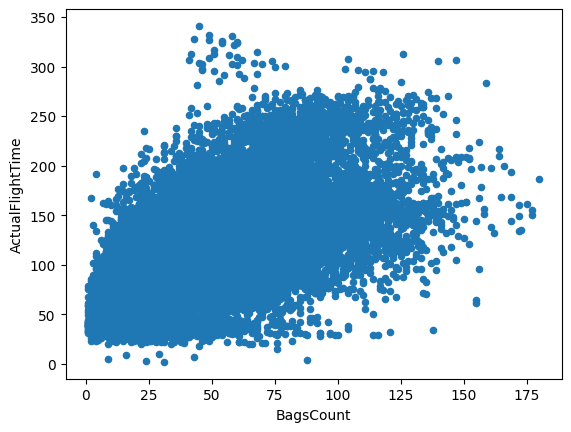

In [57]:
df_filtered = df[(df['BagsCount'] <= 200) & (df['ActualFlightTime'] <= 500)]
df_filtered.plot(kind='scatter', x="BagsCount", y="ActualFlightTime")

In this case, the correlation is much smaller.

<Axes: xlabel='FLownPassengers', ylabel='BagsCount'>

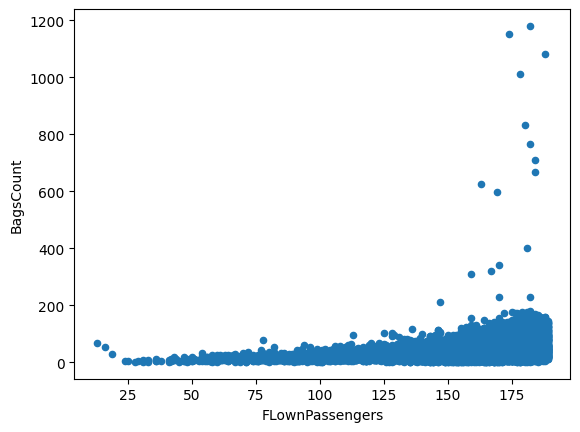

In [40]:
df.plot(kind='scatter', y="BagsCount", x="FLownPassengers")

<Axes: xlabel='FLownPassengers', ylabel='BagsCount'>

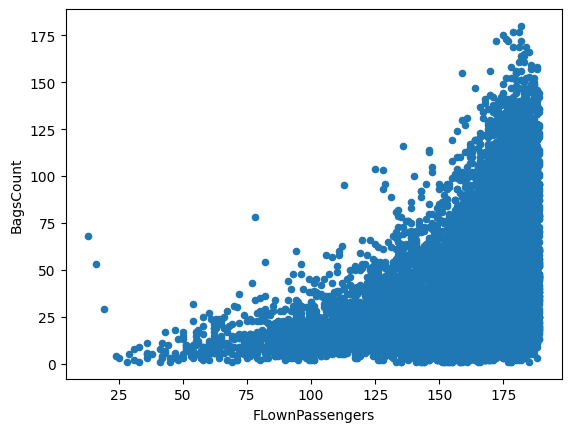

In [41]:
df_filtered = df[(df['BagsCount'] <= 200) & (df['FLownPassengers'] <= 500)]
df_filtered.plot(kind='scatter', y="BagsCount", x="FLownPassengers")

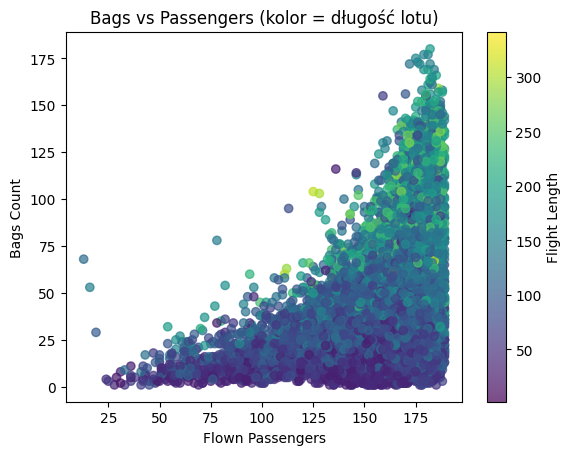

In [43]:
df_filtered = df[(df['BagsCount'] <= 200) & (df['FLownPassengers'] <= 500) & (df["ActualFlightTime"] < 800)]

plt.scatter(
    df_filtered['FLownPassengers'],
    df_filtered['BagsCount'],
    c=df_filtered['ActualFlightTime'],   # Kolor zależny od długości lotu
    cmap='viridis',                  # Możesz wybrać dowolną mapę kolorów, np. 'plasma', 'coolwarm', itp.
    alpha=0.7
)
plt.colorbar(label='Flight Length')  # Dodaje pasek kolorów
plt.xlabel('Flown Passengers')
plt.ylabel('Bags Count')
plt.title('Bags vs Passengers (kolor = długość lotu)')
plt.show()

### NOTE:
The amount of luggage is affected primarily by the number of passengers, although sometimes also by the length of the flight.

<Axes: xlabel='ActualTotalFuel', ylabel='ActualTOW'>

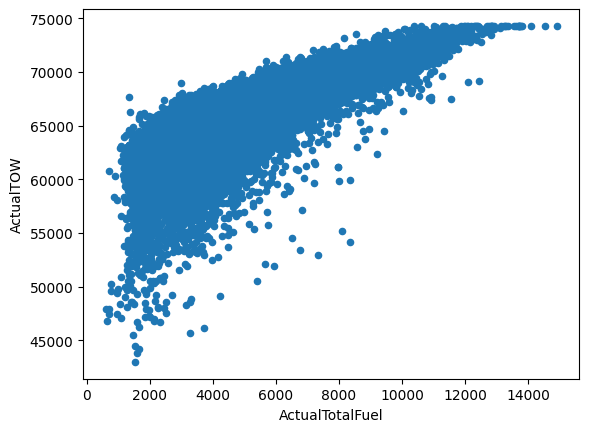

In [16]:
df.plot(kind='scatter', x="ActualTotalFuel", y="ActualTOW")

## SIMPLE RF MODEL TO BETTER UNDERSTAND DATA

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np

In [72]:
df.columns

Index(['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay',
       'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route',
       'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FLownPassengers',
       'BagsCount', 'FlightBagsWeight'],
      dtype='object')

In [73]:
# 1. Uzupełnij wybrane kolumny średnią
columns_to_fill = ['ActualFlightTime', 'ActualTotalFuel', 'FLownPassengers',
       'BagsCount', 'FlightBagsWeight']  # ← podaj swoje kolumny

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].median())

# 2. Usuń wiersze, gdzie target ma NaN
df = df.dropna(subset=["ActualTOW"])

In [74]:
df.isna().any()

DepartureDate       False
DepartureYear       False
DepartureMonth      False
DepartureDay        False
FlightNumber        False
DepartureAirport    False
ArrivalAirport      False
Route               False
ActualFlightTime    False
ActualTotalFuel     False
ActualTOW           False
FLownPassengers     False
BagsCount           False
FlightBagsWeight    False
dtype: bool

In [75]:
X = df.drop(columns=['ActualTOW', 'DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay',
       'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route'])  
y = df['ActualTOW']

In [76]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [77]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print("RMSE:", rmse)

RMSE: 1012.0673408054489


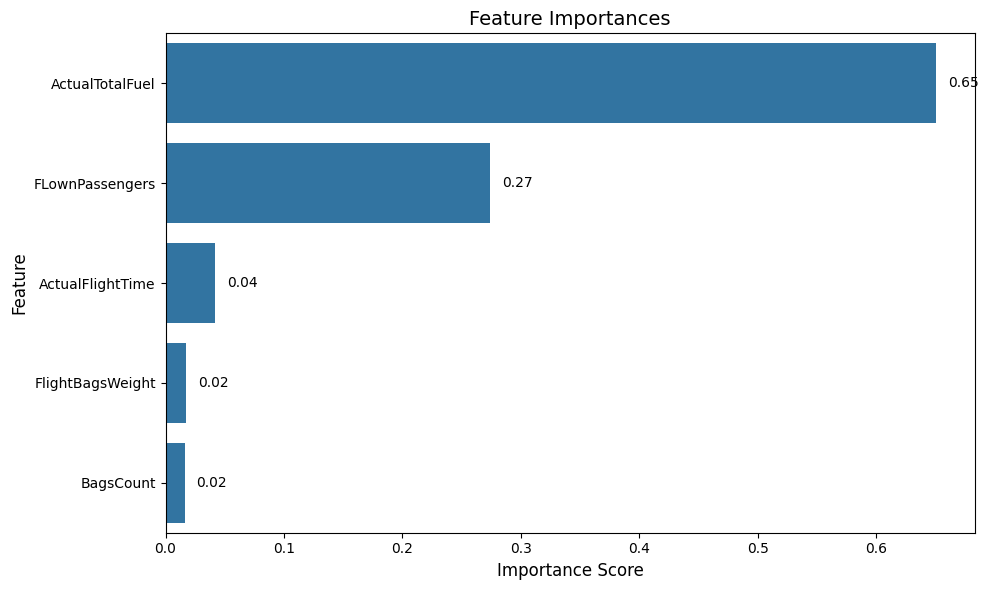

In [79]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances.values, y=feature_importances.index)

# Dodanie wartości na słupkach
for i, v in enumerate(feature_importances.values):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

# Tytuł i opisy osi
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()

### NOTE:
The feature importance inspection indicates that the amount of fuel has the greatest impact on the outcome.

In [ ]:
cv = KFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(
    model, X, y, cv=cv, scoring='neg_root_mean_squared_error'
)

print("CV RMSE (folds):", -cv_scores)
print("MEAN CV RMSE:", -cv_scores.mean())

CV RMSE (folds): [1055.13388978 1051.26677742  975.94290893 1022.90267768  968.8590989
 1023.30533429 1045.90290897  994.39032431 1004.93342781 1075.14300074]
Średnie CV RMSE: 1021.7780348812988
